In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.tsa as ts
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [2]:
pd.read_feather('DT_4_ind.dms')

,date_time,value,week,date,type
0,2012-01-02 00:00:00+00:00,1590.2104,Monday,2012-01-02,Commercial Property
1,2012-01-02 00:30:00+00:00,1563.7724,Monday,2012-01-02,Commercial Property
2,2012-01-02 01:00:00+00:00,1559.9143,Monday,2012-01-02,Commercial Property
3,2012-01-02 01:30:00+00:00,1584.6709,Monday,2012-01-02,Commercial Property
4,2012-01-02 02:00:00+00:00,1604.2810,Monday,2012-01-02,Commercial Property
...,...,...,...,...,...
70075,2012-12-31 21:30:00+00:00,3548.2788,Monday,2012-12-31,Light Industrial
70076,2012-12-31 22:00:00+00:00,3488.1609,Monday,2012-12-31,Light Industrial
70077,2012-12-31 22:30:00+00:00,3510.1997,Monday,2012-12-31,Light Industrial
70078,2012-12-31 23:00:00+00:00,3533.6776,Monday,2012-12-31,Light Industrial


/Users/thomas.kealy/anaconda3/envs/ds-reacts/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/thomas.kealy/anaconda3/envs/ds-reacts/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


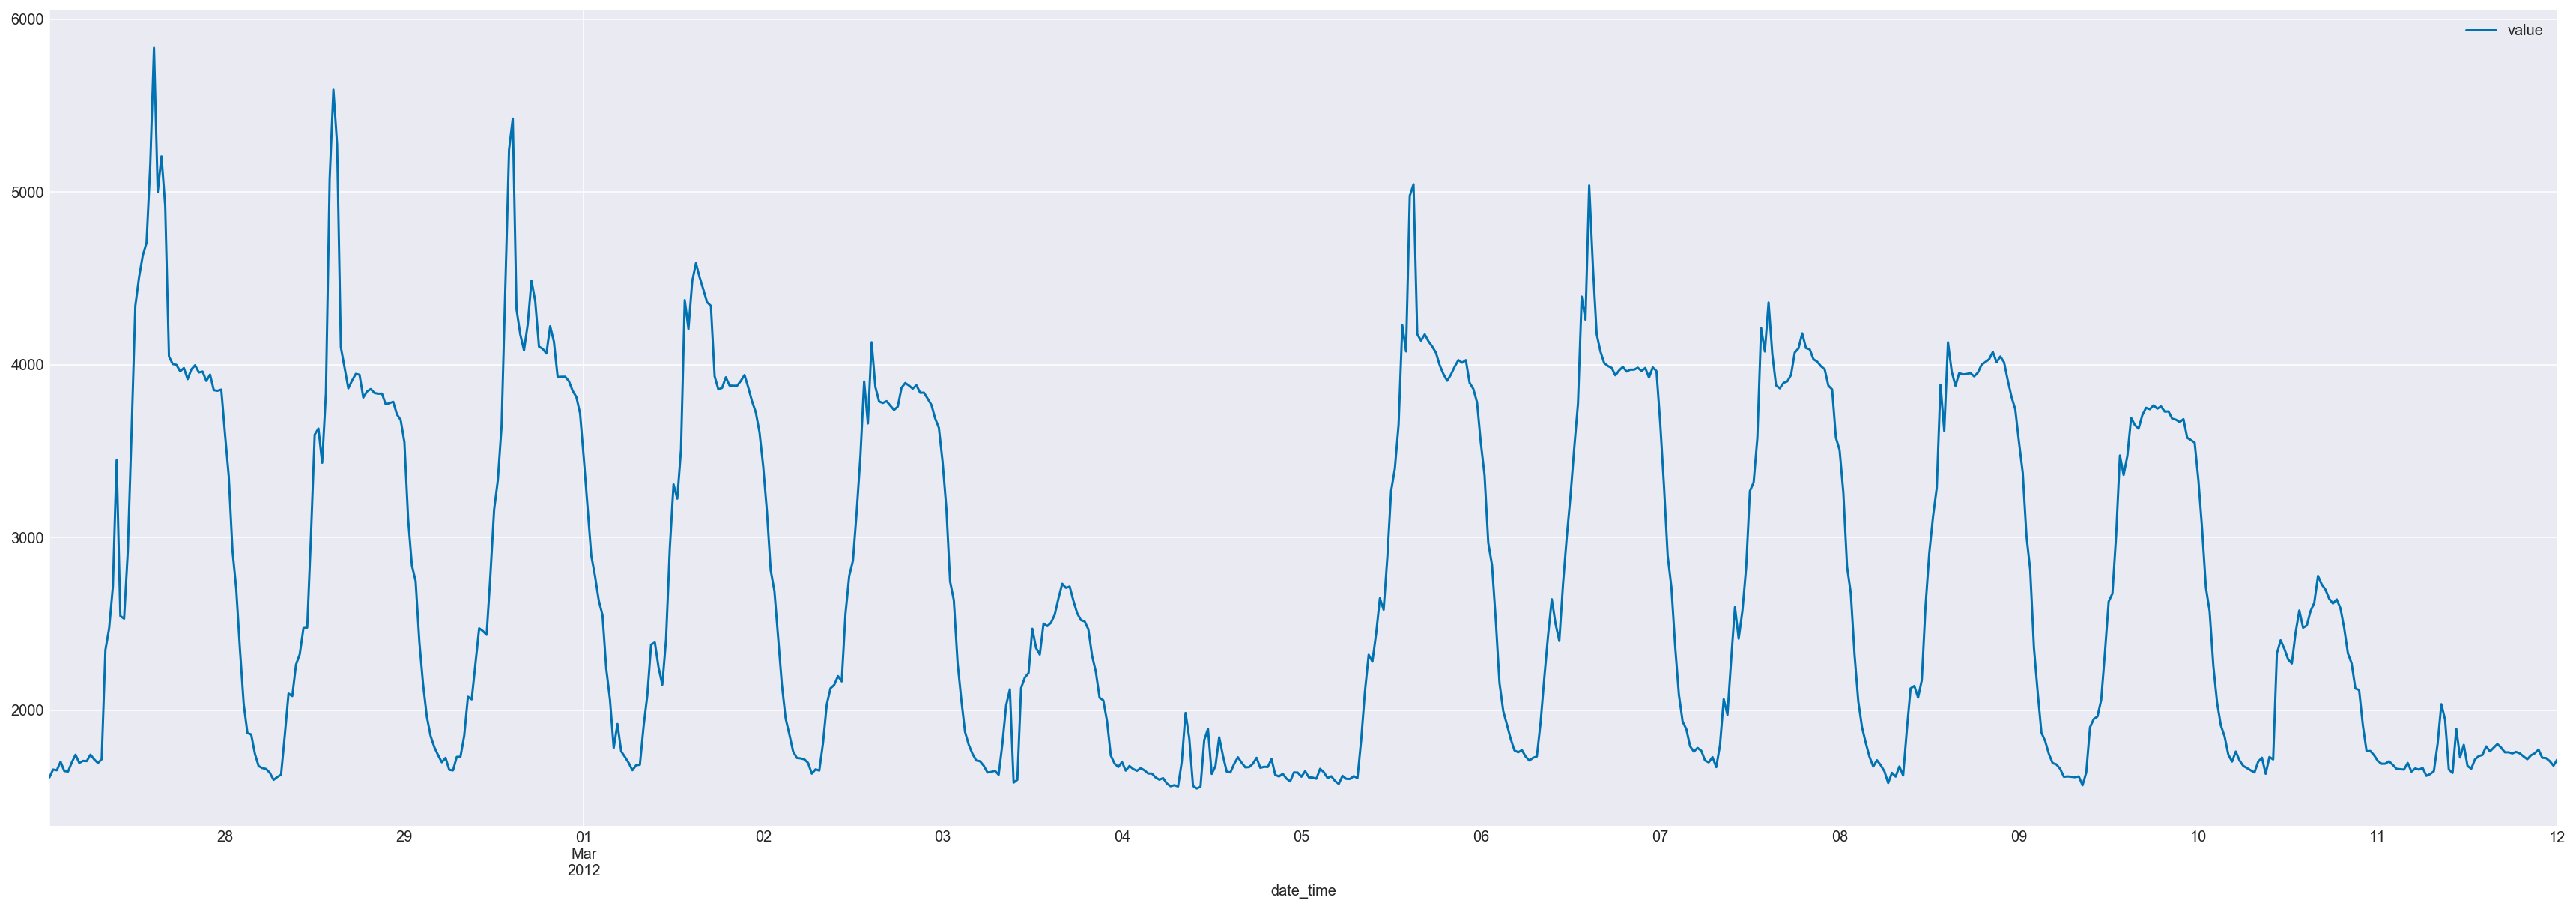

In [4]:
def load_data(file):
    df = pd.read_feather(file)

    weekday_map = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
    df['weekday'] = df['week'].map(weekday_map)

    n_type = pd.unique(df['type'])
    n_date = pd.unique(df['date_time'])
    n_weekdays = pd.unique(df['weekday'])
    period = 48
    begin = "2012-02-27"
    end = "2012-03-12"
    mask = (df['date_time'] > begin) & (df['date_time'] <= end)
    data = df.loc[mask]

    data = data[df['type'] == n_type[0]]
    return data

data = load_data('DT_4_ind.dms')

data.plot(x='date_time', y='value', figsize=(30, 10))